In [11]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [29]:
# Read data
df = pd.read_csv('SocialNetworkAds.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [31]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [32]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [119]:
# Pass column "Gender" for numeric
df['Gender'] = df['Gender'].astype('category').cat.codes
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


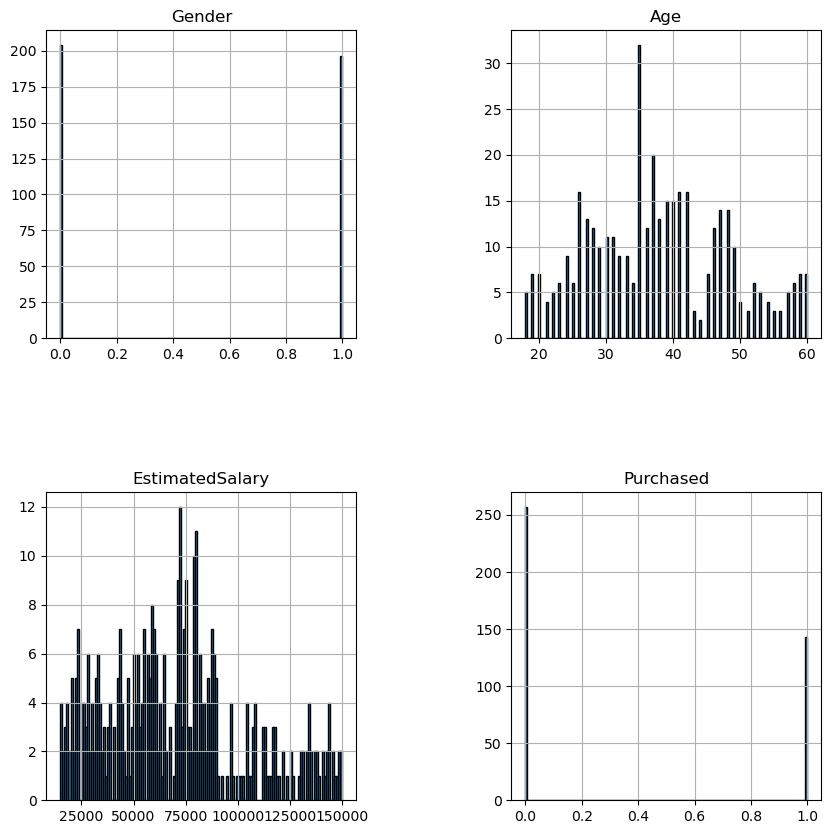

In [137]:
# Plot histograms for columns in the DataFrame
df.iloc[:, 1:].hist(figsize=(10, 10), bins= 140, edgecolor="black") # drop User ID column
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [148]:
# Define features (X) and variable answer (y)

X = df.drop(['User ID', 'Purchased'], axis = 1)

y = df['Purchased'].copy()

In [149]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [104]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [150]:
# Split sets in Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [151]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 3)
(100, 3)
(300,)
(100,)


In [107]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
from sklearn.linear_model  import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [109]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

# Implement GaussianNB

In [160]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()

In [161]:
classifier.fit(X_train,y_train)

GaussianNB()

In [162]:
y_pred = classifier.predict(X_test)

In [163]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [164]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[65  3]
 [ 7 25]]


In [165]:
# calculate Accuracy

from sklearn.metrics import accuracy_score

print('Accuracy Score: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy Score: 90.00


In [166]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [168]:
age = 19
gender = 0  #Type numeric; Female = O, Male = 1
Estimated_Salary = 100000

output=classifier.predict(sc.transform([[ gender,age ,Estimated_Salary ]]))

print("Purchased =", output)


if output==[1]:
  print( 'Custome will purchase Product')
else:
  print('Customer will not purchase computer')

Purchased = [0]
Customer will not purchase computer


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [118]:
df[df['Purchased'] == 1].sort_values(by = 'Age')

,User ID,Gender,Age,EstimatedSalary,Purchased
146,15750839,0,27,96000,1
31,15729054,0,27,137000,1
97,15582492,1,28,123000,1
168,15789815,1,29,148000,1
137,15687491,1,30,107000,1
...,...,...,...,...,...
272,15791373,1,60,42000,1
393,15635893,1,60,42000,1
370,15611430,0,60,46000,1
223,15593715,1,60,102000,1


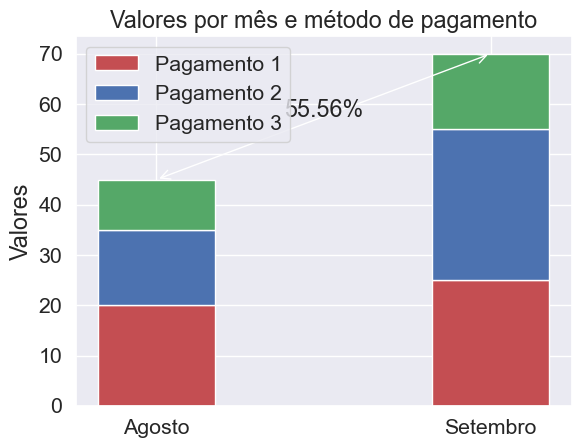

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
N = 2
pagamento1 = np.array((20, 25))
pagamento2 = np.array((15, 30))
pagamento3 = np.array((10, 15))
total = pagamento1 + pagamento2 + pagamento3

ind = np.arange(N)    # as posições x dos grupos
width = 0.35       # a largura das barras

fig, ax = plt.subplots()

# Barras
rects1 = ax.bar(ind, pagamento1, width, color='r')
rects2 = ax.bar(ind, pagamento2, width, bottom=pagamento1, color='b')
rects3 = ax.bar(ind, pagamento3, width, bottom=pagamento1+pagamento2, color='g')

# Adiciona texto para rótulos, título e eixos
ax.set_ylabel('Valores')
ax.set_title('Valores por mês e método de pagamento')
ax.set_xticks(ind)
ax.set_xticklabels(('Agosto', 'Setembro'))

# Adiciona uma legenda
ax.legend((rects1[0], rects2[0], rects3[0]), ('Pagamento 1', 'Pagamento 2', 'Pagamento 3'))

# Calcula a diferença percentual
diff = ((total[1] - total[0]) / total[0]) * 100

# Desenha a seta de diferença de totais
plt.annotate('', xy=(1,total[1]), xytext=(0,total[0]), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, (total[0]+total[1])/2, f'{diff:.2f}%', ha='center')

plt.show()




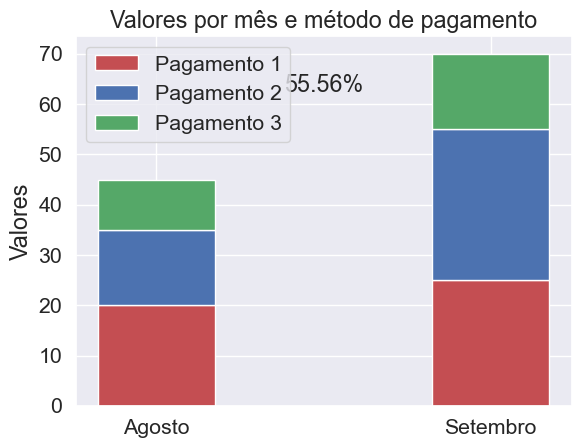

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
N = 2
pagamento1 = np.array((20, 25))
pagamento2 = np.array((15, 30))
pagamento3 = np.array((10, 15))
total = pagamento1 + pagamento2 + pagamento3

ind = np.arange(N)    # as posições x dos grupos
width = 0.35       # a largura das barras

fig, ax = plt.subplots()

# Barras
rects1 = ax.bar(ind, pagamento1, width, color='r')
rects2 = ax.bar(ind, pagamento2, width, bottom=pagamento1, color='b')
rects3 = ax.bar(ind, pagamento3, width, bottom=pagamento1+pagamento2, color='g')

# Adiciona texto para rótulos, título e eixos
ax.set_ylabel('Valores')
ax.set_title('Valores por mês e método de pagamento')
ax.set_xticks(ind)
ax.set_xticklabels(('Agosto', 'Setembro'))

# Adiciona uma legenda
ax.legend((rects1[0], rects2[0], rects3[0]), ('Pagamento 1', 'Pagamento 2', 'Pagamento 3'))

# Calcula a diferença percentual
diff = ((total[1] - total[0]) / total[0]) * 100

# Desenha a seta de diferença de totais
plt.annotate('', xy=(1,total[1]+5), xytext=(0,total[0]+5), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, (total[0]+total[1])/2 + 5, f'{diff:.2f}%', ha='center')

plt.show()


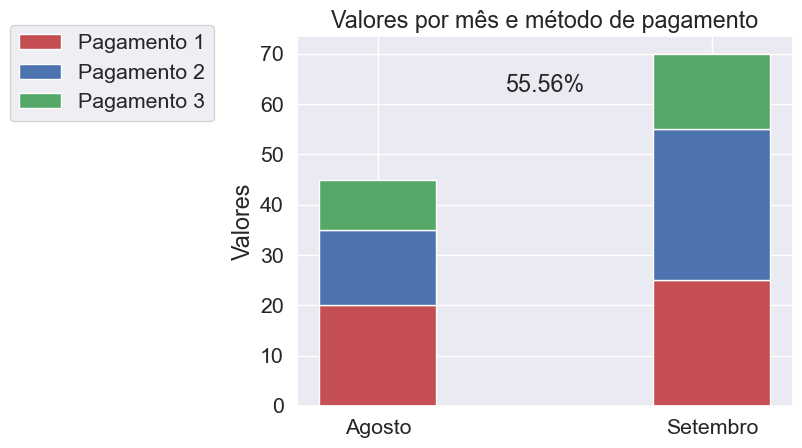

In [179]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
N = 2
pagamento1 = np.array((20, 25))
pagamento2 = np.array((15, 30))
pagamento3 = np.array((10, 15))
total = pagamento1 + pagamento2 + pagamento3

ind = np.arange(N)    # as posições x dos grupos
width = 0.35       # a largura das barras

fig, ax = plt.subplots()

# Barras
rects1 = ax.bar(ind, pagamento1, width, color='r')
rects2 = ax.bar(ind, pagamento2, width, bottom=pagamento1, color='b')
rects3 = ax.bar(ind, pagamento3, width, bottom=pagamento1+pagamento2, color='g')

# Adiciona texto para rótulos, título e eixos
ax.set_ylabel('Valores')
ax.set_title('Valores por mês e método de pagamento')
ax.set_xticks(ind)
ax.set_xticklabels(('Agosto', 'Setembro'))

# Adiciona uma legenda à esquerda do gráfico
ax.legend((rects1[0], rects2[0], rects3[0]), ('Pagamento 1', 'Pagamento 2', 'Pagamento 3'), loc='center left', bbox_to_anchor=(-0.6, 0.9))

# Calcula a diferença percentual
diff = ((total[1] - total[0]) / total[0]) * 100

# Desenha a seta de diferença de totais
plt.annotate('', xy=(1,total[1]+5), xytext=(0,total[0]+5), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, (total[0]+total[1])/2 + 5, f'{diff:.2f}%', ha='center')

plt.show()


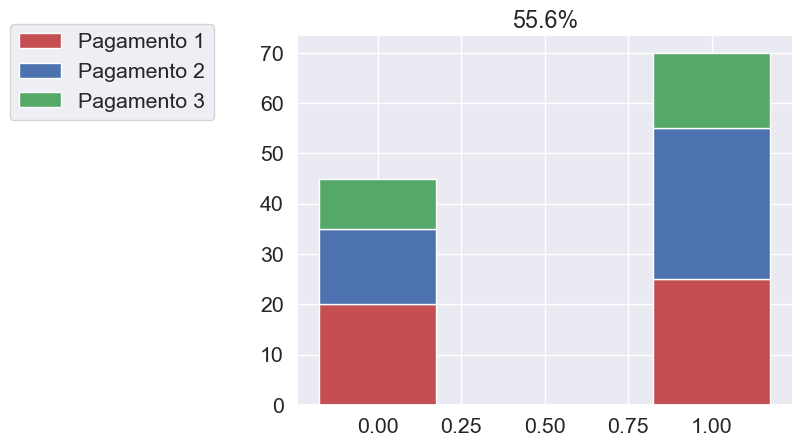

In [183]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
N = 2
pagamento1 = np.array((20, 25))
pagamento2 = np.array((15, 30))
pagamento3 = np.array((10, 15))
total = pagamento1 + pagamento2 + pagamento3

ind = np.arange(N)    # as posições x dos grupos
width = 0.35       # a largura das barras

fig, ax = plt.subplots()

# Barras
rects1 = ax.bar(ind, pagamento1, width, color='r')
rects2 = ax.bar(ind, pagamento2, width, bottom=pagamento1, color='b')
rects3 = ax.bar(ind, pagamento3, width, bottom=pagamento1+pagamento2, color='g')

# Adiciona texto para rótulos, título e eixos
#ax.set_ylabel('Valores')
#ax.set_title('Valores por mês e método de pagamento')
#ax.set_xticks(ind)
#ax.set_xticklabels(('Agosto', 'Setembro'))

# Adiciona uma legenda à esquerda do gráfico
ax.legend((rects1[0], rects2[0], rects3[0]), ('Pagamento 1', 'Pagamento 2', 'Pagamento 3'), loc='center left', bbox_to_anchor=(-0.6, 0.9))

# Calcula a diferença percentual
diff = ((total[1] - total[0]) / total[0]) * 100

# Desenha a seta de diferença de totais acima da maior barra empilhada
max_height = max(total)
plt.annotate('', xy=(1,total[1]+5), xytext=(0,total[0]+5), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, max_height + 5, f'{diff:.f}%', ha='center')

plt.show()


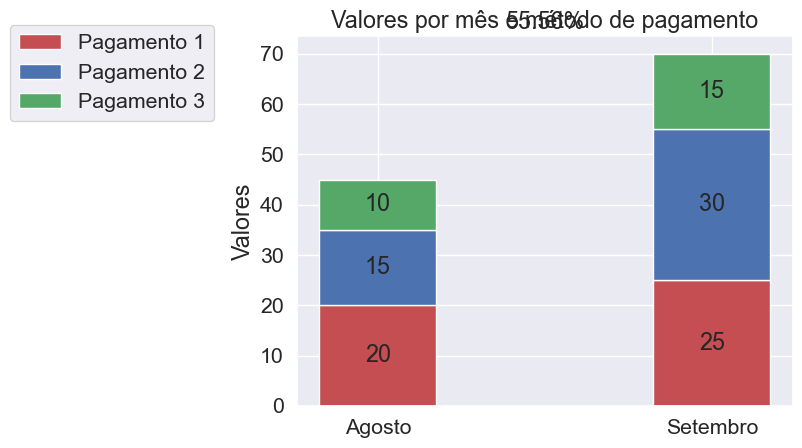

In [184]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
N = 2
pagamento1 = np.array((20, 25))
pagamento2 = np.array((15, 30))
pagamento3 = np.array((10, 15))
total = pagamento1 + pagamento2 + pagamento3

ind = np.arange(N)    # as posições x dos grupos
width = 0.35       # a largura das barras

fig, ax = plt.subplots()

# Barras
rects1 = ax.bar(ind, pagamento1, width, color='r')
rects2 = ax.bar(ind, pagamento2, width, bottom=pagamento1, color='b')
rects3 = ax.bar(ind, pagamento3, width, bottom=pagamento1+pagamento2, color='g')

# Adiciona texto para rótulos, título e eixos
ax.set_ylabel('Valores')
ax.set_title('Valores por mês e método de pagamento')
ax.set_xticks(ind)
ax.set_xticklabels(('Agosto', 'Setembro'))

# Adiciona uma legenda à esquerda do gráfico
ax.legend((rects1[0], rects2[0], rects3[0]), ('Pagamento 1', 'Pagamento 2', 'Pagamento 3'), loc='center left', bbox_to_anchor=(-0.6, 0.9))

# Calcula a diferença percentual
diff = ((total[1] - total[0]) / total[0]) * 100

# Desenha a seta de diferença de totais acima da maior barra empilhada
max_height = max(total)
plt.annotate('', xy=(1,total[1]+5), xytext=(0,total[0]+5), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, max_height + 5, f'{diff:.2f}%', ha='center')

# Adiciona a quantidade dentro de cada pagamento
for i in range(N):
    plt.text(i, pagamento1[i]/2, str(pagamento1[i]), ha='center', va='center')
    plt.text(i, pagamento1[i]+pagamento2[i]/2, str(pagamento2[i]), ha='center', va='center')
    plt.text(i, total[i]-pagamento3[i]/2, str(pagamento3[i]), ha='center', va='center')

plt.show()


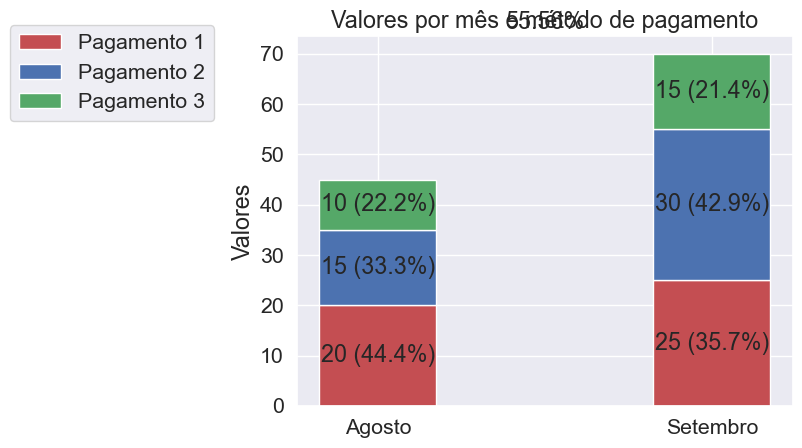

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
N = 2
pagamento1 = np.array((20, 25))
pagamento2 = np.array((15, 30))
pagamento3 = np.array((10, 15))
total = pagamento1 + pagamento2 + pagamento3

ind = np.arange(N)    # as posições x dos grupos
width = 0.35       # a largura das barras

fig, ax = plt.subplots()

# Barras
rects1 = ax.bar(ind, pagamento1, width, color='r')
rects2 = ax.bar(ind, pagamento2, width, bottom=pagamento1, color='b')
rects3 = ax.bar(ind, pagamento3, width, bottom=pagamento1+pagamento2, color='g')

# Adiciona texto para rótulos, título e eixos
ax.set_ylabel('Valores')
ax.set_title('Valores por mês e método de pagamento')
ax.set_xticks(ind)
ax.set_xticklabels(('Agosto', 'Setembro'))

# Adiciona uma legenda à esquerda do gráfico
ax.legend((rects1[0], rects2[0], rects3[0]), ('Pagamento 1', 'Pagamento 2', 'Pagamento 3'), loc='center left', bbox_to_anchor=(-0.6, 0.9))

# Calcula a diferença percentual
diff = ((total[1] - total[0]) / total[0]) * 100

# Desenha a seta de diferença de totais acima da maior barra empilhada
max_height = max(total)
plt.annotate('', xy=(1,total[1]+5), xytext=(0,total[0]+5), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, max_height + 5, f'{diff:.2f}%', ha='center')

# Adiciona a quantidade dentro de cada pagamento
for i in range(N):
    plt.text(i, pagamento1[i]/2, f'{pagamento1[i]} ({pagamento1[i]/total[i]*100:.1f}%)', ha='center', va='center')
    plt.text(i, pagamento1[i]+pagamento2[i]/2, f'{pagamento2[i]} ({pagamento2[i]/total[i]*100:.1f}%)', ha='center', va='center')
    plt.text(i, total[i]-pagamento3[i]/2, f'{pagamento3[i]} ({pagamento3[i]/total[i]*100:.1f}%)', ha='center', va='center')

plt.show()


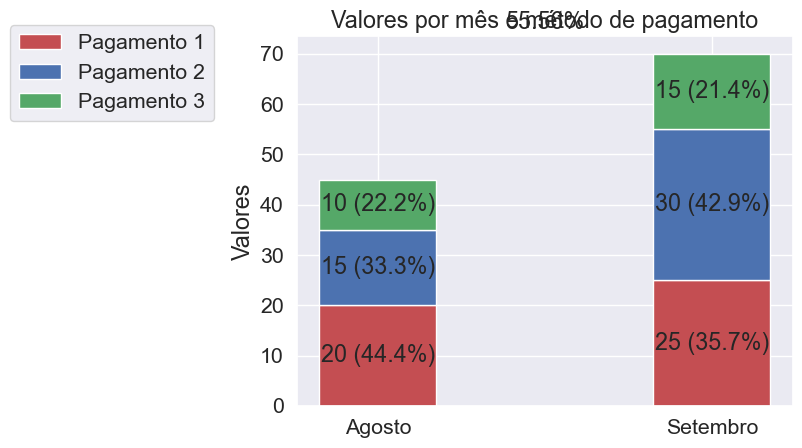

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
N = 2
pagamento1 = np.array((20, 25))
pagamento2 = np.array((15, 30))
pagamento3 = np.array((10, 15))
total = pagamento1 + pagamento2 + pagamento3

ind = np.arange(N)    # as posições x dos grupos
width = 0.35       # a largura das barras

fig, ax = plt.subplots()

# Barras
rects1 = ax.bar(ind, pagamento1, width, color='r')
rects2 = ax.bar(ind, pagamento2, width, bottom=pagamento1, color='b')
rects3 = ax.bar(ind, pagamento3, width, bottom=pagamento1+pagamento2, color='g')

# Adiciona texto para rótulos, título e eixos
ax.set_ylabel('Valores')
ax.set_title('Valores por mês e método de pagamento')
ax.set_xticks(ind)
ax.set_xticklabels(('Agosto', 'Setembro'))

# Adiciona uma legenda à esquerda do gráfico
ax.legend((rects1[0], rects2[0], rects3[0]), ('Pagamento 1', 'Pagamento 2', 'Pagamento 3'), loc='center left', bbox_to_anchor=(-0.6, 0.9))

# Calcula a diferença percentual
diff = ((total[1] - total[0]) / total[0]) * 100

# Desenha a seta de diferença de totais acima da maior barra empilhada
max_height = max(total)
plt.annotate('', xy=(1,total[1]+5), xytext=(0,total[0]+5), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, max_height + 5, f'{diff:.2f}%', ha='center')

# Adiciona a quantidade dentro de cada pagamento
for i in range(N):
    plt.text(i, pagamento1[i]/2, f'{pagamento1[i]} ({pagamento1[i]/total[i]*100:.1f}%)', ha='center', va='center')
    plt.text(i, pagamento1[i]+pagamento2[i]/2, f'{pagamento2[i]} ({pagamento2[i]/total[i]*100:.1f}%)', ha='center', va='center')
    plt.text(i, total[i]-pagamento3[i]/2, f'{pagamento3[i]} ({pagamento3[i]/total[i]*100:.1f}%)', ha='center', va='center')

plt.show()


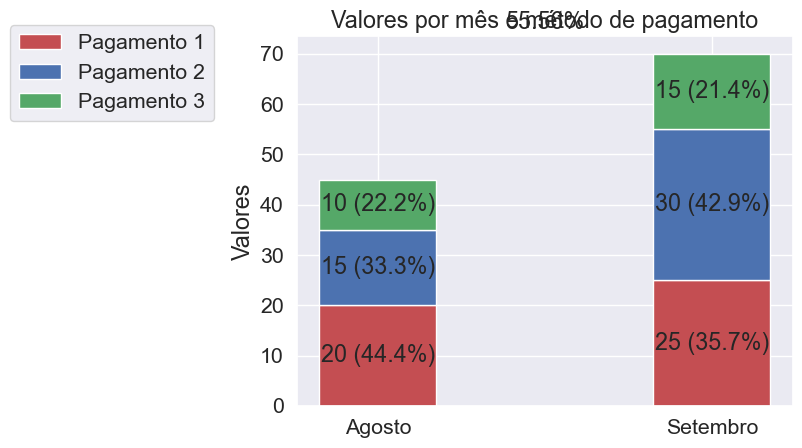

In [187]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
N = 2
pagamento1 = np.array((20, 25))
pagamento2 = np.array((15, 30))
pagamento3 = np.array((10, 15))
total = pagamento1 + pagamento2 + pagamento3

ind = np.arange(N)    # as posições x dos grupos
width = 0.35       # a largura das barras

fig, ax = plt.subplots()

# Barras
rects1 = ax.bar(ind, pagamento1, width, color='r')
rects2 = ax.bar(ind, pagamento2, width, bottom=pagamento1, color='b')
rects3 = ax.bar(ind, pagamento3, width, bottom=pagamento1+pagamento2, color='g')

# Adiciona texto para rótulos, título e eixos
ax.set_ylabel('Valores')
ax.set_title('Valores por mês e método de pagamento')
ax.set_xticks(ind)
ax.set_xticklabels(('Agosto', 'Setembro'))

# Adiciona uma legenda à esquerda do gráfico
ax.legend((rects1[0], rects2[0], rects3[0]), ('Pagamento 1', 'Pagamento 2', 'Pagamento 3'), loc='center left', bbox_to_anchor=(-0.6, 0.9))

# Calcula a diferença percentual
diff = ((total[1] - total[0]) / total[0]) * 100

# Desenha a seta de diferença de totais acima da maior barra empilhada
max_height = max(total)
plt.annotate('', xy=(1,total[1]+5), xytext=(0,total[0]+5), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, max_height + 5, f'{diff:.2f}%', ha='center')

# Adiciona a quantidade dentro de cada pagamento
for i in range(N):
    plt.text(i, pagamento1[i]/2, f'{pagamento1[i]} ({pagamento1[i]/total[i]*100:.1f}%)', ha='center', va='center')
    plt.text(i, pagamento1[i]+pagamento2[i]/2, f'{pagamento2[i]} ({pagamento2[i]/total[i]*100:.1f}%)', ha='center', va='center')
    plt.text(i, total[i]-pagamento3[i]/2, f'{pagamento3[i]} ({pagamento3[i]/total[i]*100:.1f}%)', ha='center', va='center')

plt.show()


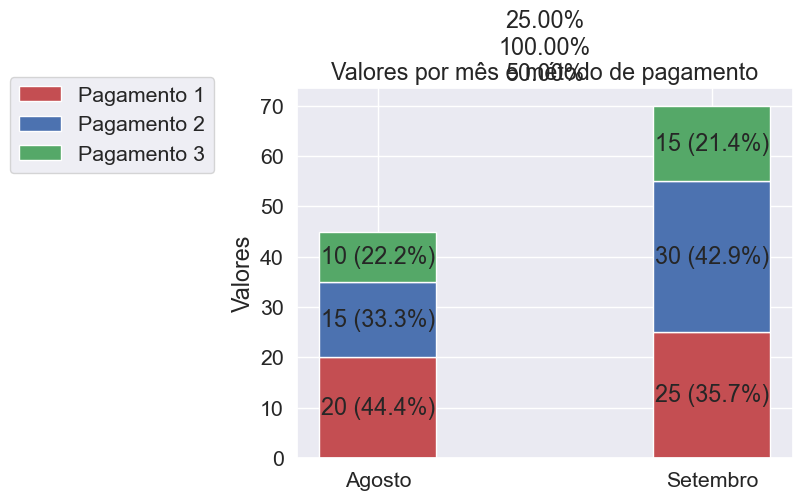

In [188]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
N = 2
pagamento1 = np.array((20, 25))
pagamento2 = np.array((15, 30))
pagamento3 = np.array((10, 15))
total = pagamento1 + pagamento2 + pagamento3

ind = np.arange(N)    # as posições x dos grupos
width = 0.35       # a largura das barras

fig, ax = plt.subplots()

# Barras
rects1 = ax.bar(ind, pagamento1, width, color='r')
rects2 = ax.bar(ind, pagamento2, width, bottom=pagamento1, color='b')
rects3 = ax.bar(ind, pagamento3, width, bottom=pagamento1+pagamento2, color='g')

# Adiciona texto para rótulos, título e eixos
ax.set_ylabel('Valores')
ax.set_title('Valores por mês e método de pagamento')
ax.set_xticks(ind)
ax.set_xticklabels(('Agosto', 'Setembro'))

# Adiciona uma legenda à esquerda do gráfico
ax.legend((rects1[0], rects2[0], rects3[0]), ('Pagamento 1', 'Pagamento 2', 'Pagamento 3'), loc='center left', bbox_to_anchor=(-0.6, 0.9))

# Calcula a diferença percentual para cada pagamento entre os dois meses
diff_pagamento1 = ((pagamento1[1] - pagamento1[0]) / pagamento1[0]) * 100
diff_pagamento2 = ((pagamento2[1] - pagamento2[0]) / pagamento2[0]) * 100
diff_pagamento3 = ((pagamento3[1] - pagamento3[0]) / pagamento3[0]) * 100

# Desenha a seta de diferença de totais acima da maior barra empilhada
max_height = max(total)
plt.annotate('', xy=(1,total[1]+5), xytext=(0,total[0]+5), arrowprops=dict(arrowstyle='<->'))
plt.text(0.5, max_height + 5, f'{diff_pagamento1:.2f}%\n{diff_pagamento2:.2f}%\n{diff_pagamento3:.2f}%', ha='center')

# Adiciona a quantidade e a porcentagem dentro de cada pagamento
for i in range(N):
    plt.text(i, pagamento1[i]/2, f'{pagamento1[i]} ({pagamento1[i]/total[i]*100:.1f}%)', ha='center', va='center')
    plt.text(i, pagamento1[i]+pagamento2[i]/2, f'{pagamento2[i]} ({pagamento2[i]/total[i]*100:.1f}%)', ha='center', va='center')
    plt.text(i, total[i]-pagamento3[i]/2, f'{pagamento3[i]} ({pagamento3[i]/total[i]*100:.1f}%)', ha='center', va='center')

plt.show()
